In [1]:
import json 
import pandas as pandas
import numpy as np
import torch
import itertools
%matplotlib inline
import matplotlib.pyplot as plt

sb = json.load(open("subsequences_info.json"))
# json.dump(sb[:40], open("subsequences_info_sample.json", "w") )

correlation between subseq length and score: 
 [[ 1.         -0.85866254]
 [-0.85866254  1.        ]]
correlation between subseq length and mean-score: 
 [[ 1.         -0.14010696]
 [-0.14010696  1.        ]]


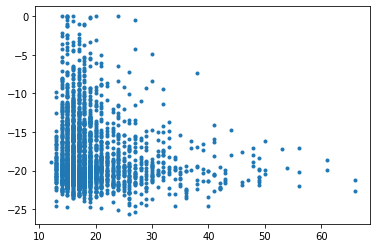

In [2]:

# compute correlation between subseq length and score
all_subseq_score = [sub 
                    for rec in sb 
                    for beam in rec['subsequences-scores']
                    for sub in beam]
all_subseq_len = [len(sub) 
                    for rec in sb 
                    for beam in rec['subsequences']
                    for sub in beam]
print("correlation between subseq length and score: \n", np.corrcoef(all_subseq_len, all_subseq_score))
# since the "sum" subseq score is correlated with length, perhaps it makes more sense to average over tokens?
all_subseq_mean_score = [sub 
                    for rec in sb 
                    for beam in rec['subsequences-mean-scores']
                    for sub in beam]
print("correlation between subseq length and mean-score: \n", np.corrcoef(all_subseq_len, all_subseq_mean_score))
plt.plot(all_subseq_len, all_subseq_mean_score, '.')

correlation between seq length and score: 
 [[1.         0.44720417]
 [0.44720417 1.        ]]


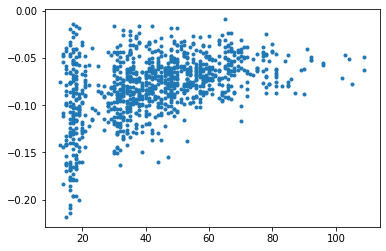

In [3]:
all_seq_score = [s 
                    for rec in sb 
                    for s in rec['sequence-scores']]
all_seq_len = [len(list(itertools.chain(*s)))
                    for rec in sb 
                    for s in rec['subsequences']]
print("correlation between seq length and score: \n", np.corrcoef(all_seq_len, all_seq_score))
plt.plot(all_seq_len, all_seq_score, '.')

correlation between seq-score and mean of subseq-mean-scores: 
 [[ 1.         -0.45821178]
 [-0.45821178  1.        ]]


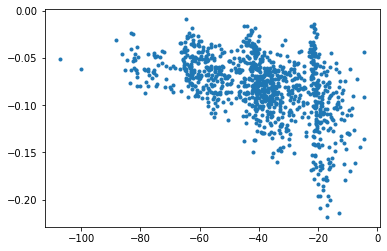

In [4]:
all_seq_score = [s 
                    for rec in sb 
                    for s in rec['sequence-scores']]
all_seq_sum_subseq_score = [np.sum(beam) 
                    for rec in sb 
                    for beam in rec['subsequences-mean-scores']]
print("correlation between seq-score and mean of subseq-mean-scores: \n", np.corrcoef(all_seq_sum_subseq_score, all_seq_score))
plt.plot(all_seq_sum_subseq_score, all_seq_score, '.')

correlation between seq-score and sum of subseq-sum-scores: 
 [[ 1.        -0.4141938]
 [-0.4141938  1.       ]]


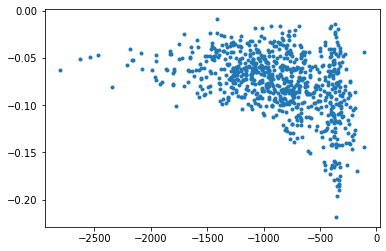

In [19]:
all_seq_mean_subseq_sumscore = [np.sum(beam) 
                    for rec in sb 
                    for beam in rec['subsequences-scores']]
print("correlation between seq-score and sum of subseq-sum-scores: \n", np.corrcoef(all_seq_mean_subseq_sumscore, all_seq_score))
plt.plot(all_seq_mean_subseq_sumscore, all_seq_score, '.')